# Stock Price Prediction Model - Tanmay Srivastava

#### In this notebook, prices of stocks are predicted using LSTM model.

In [1]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Dataset_link='/content/drive/MyDrive/AAPL_train.csv'

df= pd.read_csv(Dataset_link, parse_dates=True,)
df.reset_index()
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2006-01-03,2.669643,2.580357,2.585000,2.669643,8.072344e+08,2.284267
1,1,2006-01-04,2.713571,2.660714,2.683214,2.677500,6.196036e+08,2.290990
2,2,2006-01-05,2.675000,2.633929,2.672500,2.656429,4.494224e+08,2.272961
3,3,2006-01-06,2.739286,2.662500,2.687500,2.725000,7.044576e+08,2.331634
4,4,2006-01-09,2.757143,2.705000,2.740357,2.716071,6.750408e+08,2.323994
5,5,2006-01-10,2.924643,2.708214,2.723214,2.887857,2.279869e+09,2.470982
6,6,2006-01-11,3.028571,2.949643,2.994286,2.996428,1.493794e+09,2.563880
7,7,2006-01-12,3.085714,2.986428,3.034643,3.010357,1.280810e+09,2.575798
8,8,2006-01-13,3.071786,3.021429,3.035357,3.056786,7.763056e+08,2.615525
9,9,2006-01-17,3.085000,2.995357,3.060714,3.025357,8.356236e+08,2.588633


In [3]:
from sklearn.model_selection import train_test_split


df.drop(["Date", "Adj Close"], axis=1, inplace=True)

df['Close_Tom'] =  df['Close']

df['Close_Tom'] =  df['Close_Tom'].shift(-1)

df.dropna(axis=0, how='any', inplace=True)

df.isnull().sum()

x  = df[['Open','High','Low','Volume', 'Close']]

y = df['Close_Tom']

scaler = MinMaxScaler()
df[['Open','High','Low','Volume', 'Close']] = scaler.fit_transform(df[['Open','High','Low','Volume', 'Close']])

x_train , x_test , y_train , y_test = train_test_split(x ,y)

In [5]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)

model_rf.fit(x_train, y_train)

preds = model_rf.predict(x_test)

In [6]:
# Getting the root mean squared error

rmse=np.sqrt(np.mean(((preds- y_test)**2)))
rmse

0.8011865173876439

## Plotting predicted graph

<ipython-input-14-a186636758b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


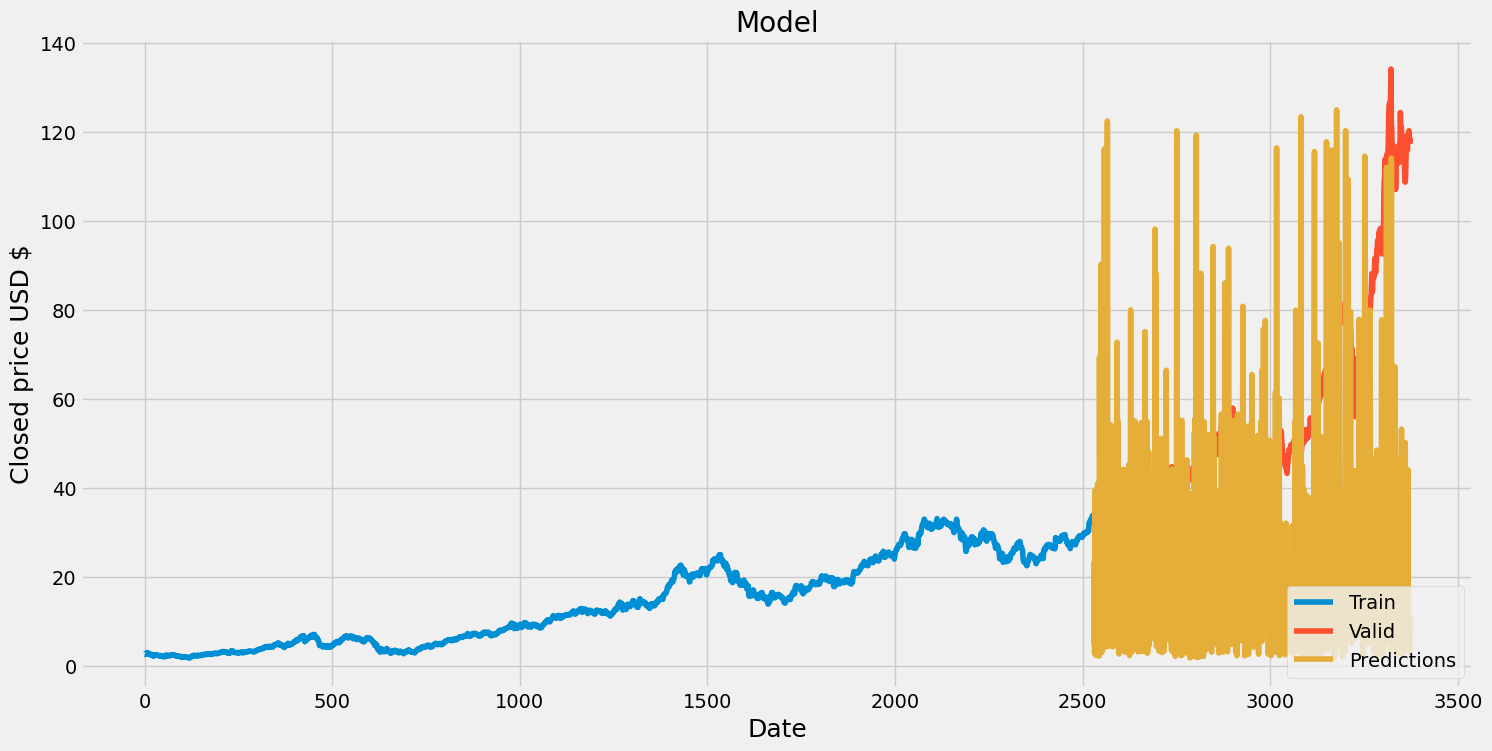

In [14]:
# Plotting the data

train = df[:len(x_train)]
valid = df[len(x_train):]
valid['Predictions'] = preds

# Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed price USD $', fontsize = 18)
plt.plot(train['Close_Tom'])
plt.plot(valid[['Close_Tom', 'Predictions']])
plt.legend(['Train', 'Valid' , 'Predictions'], loc = 'lower right')
plt.show()